# Project Overview

**Title:**  
A Comprehensive Analysis and Machine Learning Prediction of Life Expectancy with Deployment

**Objective:**  
This project aims to analyze global life expectancy trends and develop a machine learning model to predict life expectancy based on a range of socioeconomic and health indicators. The project covers the entire data science pipeline—from data cleaning and exploratory data analysis (EDA) to model building, evaluation, and eventual cloud deployment using Streamlit.

**Scope:**  
- **Data Cleaning and Preprocessing:**  
  Address missing values, standardize column names, and ensure correct data types.
- **Exploratory Data Analysis (EDA):**  
  Visualize trends and relationships among variables to understand factors influencing life expectancy.
- **Modeling:**  
  Build and compare multiple regression models (e.g., Linear Regression, Decision Tree, Random Forest, and Gradient Boosting) to predict life expectancy.
- **Deployment:**  
  Create an interactive web application using Streamlit to deploy the best performing model, allowing users to input feature values and obtain life expectancy predictions.

---

## Data Description

The dataset used in this project provides country-level health and socioeconomic indicators, which serve as predictors for life expectancy. Each row represents a country-year observation with multiple variables that describe various dimensions of health and social development.

### Key Variables and Their Descriptions

- **Status:**  
  Indicates whether a country is classified as "Developed" or "Developing." This categorical variable often reflects differences in healthcare, economic stability, and infrastructure.

- **Adult Mortality:**  
  The number of adult deaths per 1,000 individuals. This variable is a key indicator of overall health conditions and healthcare quality.

- **Infant Deaths:**  
  The number of infant deaths per 1,000 live births. High infant mortality rates are typically associated with inadequate healthcare services and poor living conditions.

- **Alcohol:**  
  Per capita alcohol consumption, which can have significant effects on public health, including life expectancy.

- **Percentage Expenditure:**  
  The percentage of GDP that a country spends on health expenditure. This provides insight into the level of investment in public health.

- **Hepatitis B:**  
  Vaccination coverage for Hepatitis B, reflecting preventive healthcare measures in place.

- **Measles:**  
  Number of reported measles cases, which can indicate the strength of public health systems and vaccination programs.

- **BMI (Body Mass Index):**  
  A measure used to evaluate whether a population has a healthy weight, which is linked to overall health and longevity.

- **Under-Five Deaths:**  
  The number of deaths among children under the age of five. Similar to infant deaths, this variable highlights the effectiveness of maternal and child healthcare.

- **Polio:**  
  Vaccination coverage for polio, serving as an indicator of a country's immunization efforts.

- **Total Expenditure:**  
  Total health expenditure per capita, providing a broader picture of investment in healthcare services.

- **Diphtheria:**  
  Vaccination coverage for diphtheria, another marker of preventive healthcare practices.

- **HIV/AIDS:**  
  Prevalence of HIV/AIDS, an important health variable that can significantly impact life expectancy.

- **GDP:**  
  Gross Domestic Product, reflecting the economic strength of a country. Economic resources often correlate with better healthcare and longer life expectancy.

- **Population:**  
  The total population of the country, which can sometimes influence the availability and quality of healthcare services.

- **Thinness (1-19 years) and Thinness (5-9 years):**  
  Indicators of malnutrition in children and adolescents, which can affect overall health and development.

- **Income Composition:**  
  A composite measure representing the income distribution within a country. Income inequality can have substantial implications for public health.

- **Schooling:**  
  Average years of schooling, a proxy for the level of education in a population. Higher education levels often correlate with better health awareness and outcomes.

- **Year:**  
  The year when the data was collected. In this project, the year is one-hot encoded into separate binary columns (e.g., `Year_2001`, `Year_2002`, ..., `Year_2015`) to capture temporal trends without implying an ordinal relationship.

---

## Methodology

1. **Data Cleaning and Imputation:**  
   The project begins with cleaning the dataset by standardizing column names, converting data types, and imputing missing values both at the country level and overall using mean imputation.

2. **Exploratory Data Analysis (EDA):**  
   Various plots (histograms, heatmaps, violin plots, and line charts) are used to understand the distribution of life expectancy and the relationships among the predictor variables.

3. **Feature Engineering:**  
   - Categorical variables such as **Status** are encoded.
   - The **Year** variable is transformed into multiple binary columns via one-hot encoding.
   - Other numeric variables are standardized to ensure that models perform optimally.

4. **Model Development:**  
   Multiple regression models, including Random Forest (the primary model), are trained to predict life expectancy. Their performance is evaluated using metrics like Mean Squared Error (MSE) and R-squared.

5. **Deployment:**  
   The final model is deployed using Streamlit, allowing end-users to interact with the model by inputting vae data and its variables, and explains the end-to-end methodology from data cleaning to model deployment.


In [2]:
import pandas as pd

# Define file path (update it if the path differs)
file_path = "LifeExpectancyData.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display basic info
print(df.info())

# Show first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Data Preprocessing

We want to preprocess the data to ensure smooth and efficient training of our model. We will first correct the column names, fix missing values

In [5]:
# Correcting the column names
df = df.rename(columns = {'Life expectancy ':'Life Expectancy',
'infant deaths':'Infant Deaths',
'percentage expenditure':'Percentage Expenditure',
'Measles ':'Measles',
' BMI ':'BMI',
'under-five deaths ':'Under-Five Deaths',
'Total expenditure':'Total Expenditure',
'Diphtheria ':'Diphtheria',
' HIV/AIDS':'HIV/AIDS',
' thinness  1-19 years':'Thinness (1-19 years)',
' thinness 5-9 years':'Thinness (5-9 years)',
'Income composition of resources':'Income Composition'})
df.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness (1-19 years),Thinness (5-9 years),Income Composition,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
# Displaying the number of null values for each column
df.isnull().sum()

Country                     0
Year                        0
Status                      0
Life Expectancy            10
Adult Mortality            10
Infant Deaths               0
Alcohol                   194
Percentage Expenditure      0
Hepatitis B               553
Measles                     0
BMI                        34
Under-Five Deaths           0
Polio                      19
Total Expenditure         226
Diphtheria                 19
HIV/AIDS                    0
GDP                       448
Population                652
Thinness (1-19 years)      34
Thinness (5-9 years)       34
Income Composition        167
Schooling                 163
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2938 non-null   object 
 1   Year                    2938 non-null   int64  
 2   Status                  2938 non-null   object 
 3   Life Expectancy         2928 non-null   float64
 4   Adult Mortality         2928 non-null   float64
 5   Infant Deaths           2938 non-null   int64  
 6   Alcohol                 2744 non-null   float64
 7   Percentage Expenditure  2938 non-null   float64
 8   Hepatitis B             2385 non-null   float64
 9   Measles                 2938 non-null   int64  
 10  BMI                     2904 non-null   float64
 11  Under-Five Deaths       2938 non-null   int64  
 12  Polio                   2919 non-null   float64
 13  Total Expenditure       2712 non-null   float64
 14  Diphtheria              2919 non-null   

In [9]:
df.isnull().sum()

Country                     0
Year                        0
Status                      0
Life Expectancy            10
Adult Mortality            10
Infant Deaths               0
Alcohol                   194
Percentage Expenditure      0
Hepatitis B               553
Measles                     0
BMI                        34
Under-Five Deaths           0
Polio                      19
Total Expenditure         226
Diphtheria                 19
HIV/AIDS                    0
GDP                       448
Population                652
Thinness (1-19 years)      34
Thinness (5-9 years)       34
Income Composition        167
Schooling                 163
dtype: int64

In [10]:
# Changing the data type of 'Year' column to string
df['Year'] = df['Year'].astype(str)

# Separating numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
non_numeric_columns= df.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

numeric_columns

['Life Expectancy',
 'Adult Mortality',
 'Infant Deaths',
 'Alcohol',
 'Percentage Expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'Under-Five Deaths',
 'Polio',
 'Total Expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Thinness (1-19 years)',
 'Thinness (5-9 years)',
 'Income Composition',
 'Schooling']

In [11]:
non_numeric_columns

['Country', 'Year', 'Status']

We will first group the data impute missing values by the mean value of each column for each country group.

In [13]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [14]:
# Imputing missing values within each country for numeric columns
for country in df['Country'].unique():
    for column in numeric_columns:
        country_data = df[df['Country'] == country][column]
        mean_value = country_data.mean()
        df.loc[df['Country'] == country, column] = df.loc[df['Country'] == country, column].fillna(mean_value)

In [15]:
# Checking if there are any missing values left
df.isnull().sum()

Country                     0
Year                        0
Status                      0
Life Expectancy            10
Adult Mortality            10
Infant Deaths               0
Alcohol                    17
Percentage Expenditure      0
Hepatitis B               144
Measles                     0
BMI                        34
Under-Five Deaths           0
Polio                       0
Total Expenditure          32
Diphtheria                  0
HIV/AIDS                    0
GDP                       405
Population                648
Thinness (1-19 years)      34
Thinness (5-9 years)       34
Income Composition        167
Schooling                 163
dtype: int64

In [16]:
import numpy as np
from sklearn.impute import SimpleImputer

# Applying overall mean imputation to remaining missing values

# Initiating SimpleImputer to fill the null values with the mean
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')

# Fitting and transforming numeric data
df_numeric = pd.DataFrame(imputer.fit_transform(df[numeric_columns]), columns=numeric_columns)

df_numeric.isnull().sum()

Life Expectancy           0
Adult Mortality           0
Infant Deaths             0
Alcohol                   0
Percentage Expenditure    0
Hepatitis B               0
Measles                   0
BMI                       0
Under-Five Deaths         0
Polio                     0
Total Expenditure         0
Diphtheria                0
HIV/AIDS                  0
GDP                       0
Population                0
Thinness (1-19 years)     0
Thinness (5-9 years)      0
Income Composition        0
Schooling                 0
dtype: int64

In [17]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Life Expectancy         2938 non-null   float64
 1   Adult Mortality         2938 non-null   float64
 2   Infant Deaths           2938 non-null   float64
 3   Alcohol                 2938 non-null   float64
 4   Percentage Expenditure  2938 non-null   float64
 5   Hepatitis B             2938 non-null   float64
 6   Measles                 2938 non-null   float64
 7   BMI                     2938 non-null   float64
 8   Under-Five Deaths       2938 non-null   float64
 9   Polio                   2938 non-null   float64
 10  Total Expenditure       2938 non-null   float64
 11  Diphtheria              2938 non-null   float64
 12  HIV/AIDS                2938 non-null   float64
 13  GDP                     2938 non-null   float64
 14  Population              2938 non-null   

In [18]:
# Combining imputed numeric data with non-numeric data

df_imputed = pd.concat([df[non_numeric_columns], df_numeric], axis=1)

df_imputed.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness (1-19 years),Thinness (5-9 years),Income Composition,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [19]:
df_imputed.isnull().sum()

Country                   0
Year                      0
Status                    0
Life Expectancy           0
Adult Mortality           0
Infant Deaths             0
Alcohol                   0
Percentage Expenditure    0
Hepatitis B               0
Measles                   0
BMI                       0
Under-Five Deaths         0
Polio                     0
Total Expenditure         0
Diphtheria                0
HIV/AIDS                  0
GDP                       0
Population                0
Thinness (1-19 years)     0
Thinness (5-9 years)      0
Income Composition        0
Schooling                 0
dtype: int64

In [20]:
# Overwriting the original dataframe with the imputed dataframe
df = df_imputed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2938 non-null   object 
 1   Year                    2938 non-null   object 
 2   Status                  2938 non-null   object 
 3   Life Expectancy         2938 non-null   float64
 4   Adult Mortality         2938 non-null   float64
 5   Infant Deaths           2938 non-null   float64
 6   Alcohol                 2938 non-null   float64
 7   Percentage Expenditure  2938 non-null   float64
 8   Hepatitis B             2938 non-null   float64
 9   Measles                 2938 non-null   float64
 10  BMI                     2938 non-null   float64
 11  Under-Five Deaths       2938 non-null   float64
 12  Polio                   2938 non-null   float64
 13  Total Expenditure       2938 non-null   float64
 14  Diphtheria              2938 non-null   

## Exploratory Data Analysis

Now we perform some EDA to get useful insights we would need when training our model. We will start by considering the summary statistics before considering the distribution of our target variable `Life Expectancy` and some other plots to see how the other vaiables relate to the target.

In [22]:
# Getting more summary statistics of the numeric columns
df.describe()

,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness (1-19 years),Thinness (5-9 years),Income Composition,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,69.224932,164.796448,30.303948,4.600849,738.251295,78.648111,2419.592240,38.321247,42.035739,82.396266,5.920966,82.183944,1.742103,7378.404536,1.273472e+07,4.839704,4.870317,0.627551,11.992793
std,9.507640,124.080302,117.926501,4.027279,1987.914858,24.558680,11467.272489,19.927677,160.445548,23.476067,2.455756,23.743205,5.077785,13158.707178,5.381690e+07,4.394535,4.482708,0.204820,3.264381
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.200000,74.000000,0.000000,0.930000,4.685343,73.500000,0.000000,19.400000,0.000000,78.000000,4.280000,78.000000,0.100000,562.082880,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,72.000000,144.000000,3.000000,3.780000,64.912906,88.000000,17.000000,43.000000,4.000000,93.000000,5.790000,93.000000,0.100000,2834.764218,3.625718e+06,3.400000,3.400000,0.662000,12.100000
75%,75.600000,227.000000,22.000000,7.677500,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.430000,97.000000,0.800000,7378.404536,1.273472e+07,7.100000,7.200000,0.772000,14.100000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Text(0, 0.5, 'Frequency')

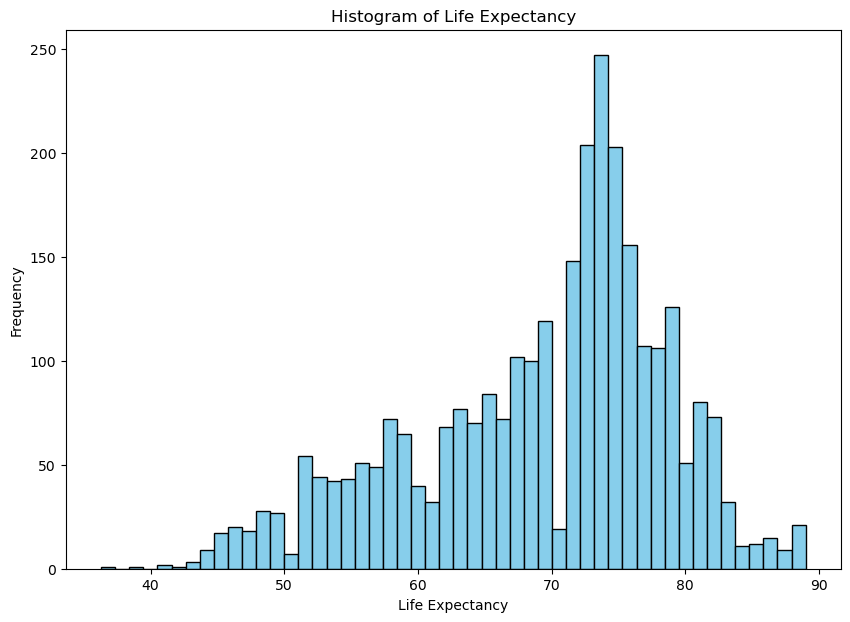

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram of Life Expectancy
plt.figure(figsize=(10, 7), facecolor='white')
plt.hist(df['Life Expectancy'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

The histogram shows a left-skewed distribution of life expectancy, with most values between 60-80 years and a peak around 70-75 years. There are fewer cases below 50, indicating disparities in health conditions. This suggests that certain countries or regions may face challenges like poor healthcare, poverty, or high disease burden, leading to shorter lifespans compared to others with better living conditions.

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Columns')

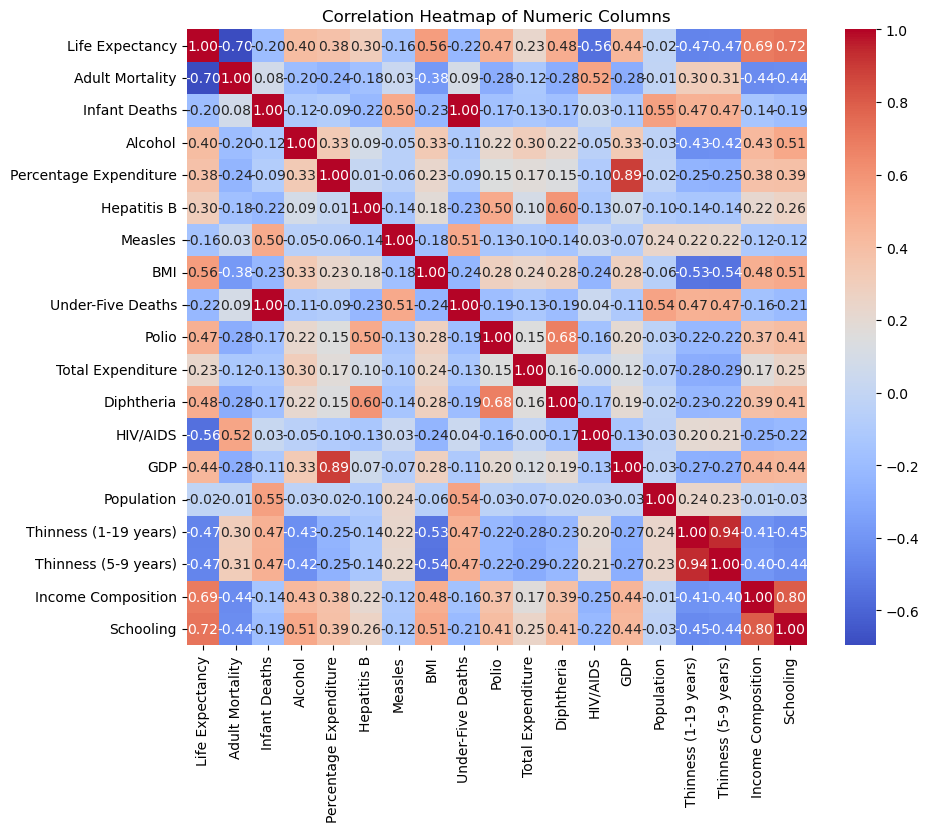

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8), facecolor='white')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns')

The heatmap shows Life Expectancy is positively correlated with Schooling (0.72) and Income Composition (0.69), while negatively correlated with variables like Adult Mortality (-0.70) and HIV/AIDS (-0.56) indicating that education, income, and healthcare access drive longevity, while mortality and disease lower it.


In [27]:
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness (1-19 years)',
       'Thinness (5-9 years)', 'Income Composition', 'Schooling'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2938 non-null   object 
 1   Year                    2938 non-null   object 
 2   Status                  2938 non-null   object 
 3   Life Expectancy         2938 non-null   float64
 4   Adult Mortality         2938 non-null   float64
 5   Infant Deaths           2938 non-null   float64
 6   Alcohol                 2938 non-null   float64
 7   Percentage Expenditure  2938 non-null   float64
 8   Hepatitis B             2938 non-null   float64
 9   Measles                 2938 non-null   float64
 10  BMI                     2938 non-null   float64
 11  Under-Five Deaths       2938 non-null   float64
 12  Polio                   2938 non-null   float64
 13  Total Expenditure       2938 non-null   float64
 14  Diphtheria              2938 non-null   

C:\Users\DELL\AppData\Local\Temp\ipykernel_13568\2322887738.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Life Expectancy', data=df[df['Status']=='Developed'], palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_13568\2322887738.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Life Expectancy', data=df[df['Status']=='Developing'], palette='Set1')


Text(0, 0.5, 'Life Expectancy (years)')

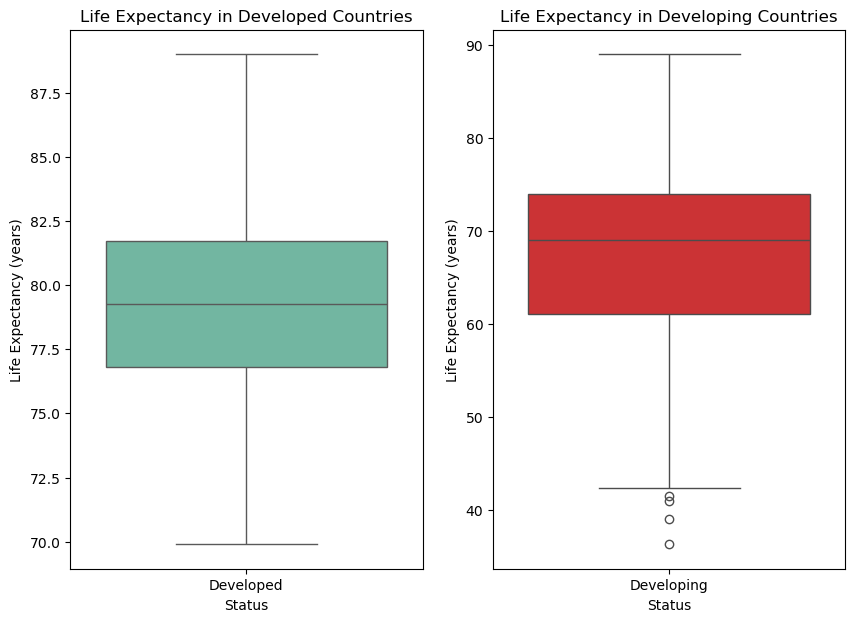

In [30]:
# Creating a violin plot comparing life expectancy in developed and developing countries
plt.figure(figsize=(10, 7), facecolor='white')
plt.subplot(1, 2, 1)
sns.boxplot(x='Status', y='Life Expectancy', data=df[df['Status']=='Developed'], palette='Set2')
plt.title('Life Expectancy in Developed Countries')
plt.xlabel('Status')
plt.ylabel('Life Expectancy (years)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Status', y='Life Expectancy', data=df[df['Status']=='Developing'], palette='Set1')
plt.title('Life Expectancy in Developing Countries')
plt.xlabel('Status')
plt.ylabel('Life Expectancy (years)')


The box plots compare Life Expectancy distributions in Developed and Developing countries. We can see that developed countries show a higher median life expectancy with less variability, indicating most countries have consistently high longevity. Developing countries have a wider spread, with life expectancy ranging from 30 to 80 years, showing greater disparities. The lower tail suggests some countries experience significantly lower life expectancy due to factors like poor healthcare, economic instability, and disease burden.

In [32]:
df.Country.nunique()

193

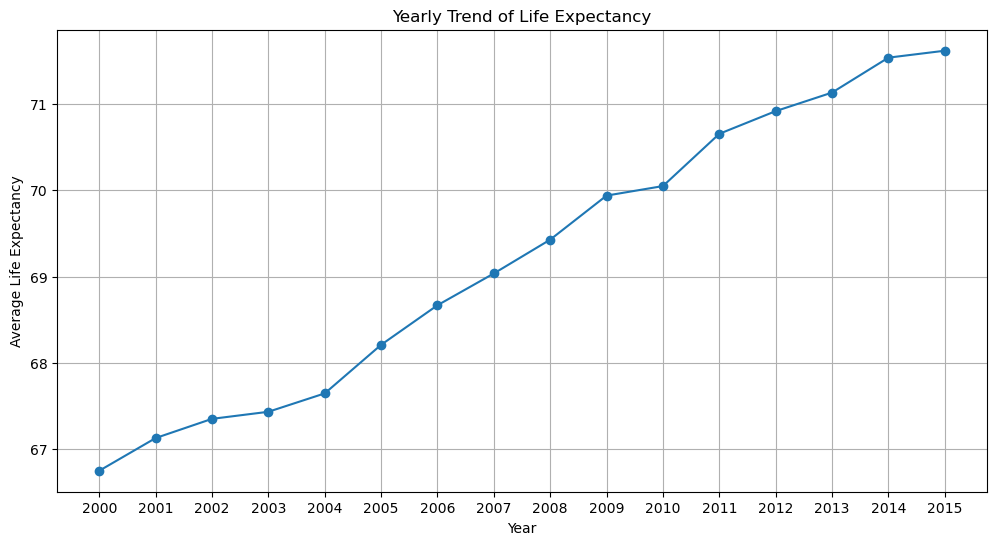

In [33]:
import matplotlib.pyplot as plt
# Group data by year and calculate the mean life expectancy for each year
yearly_life_expectancy = df.groupby('Year')['Life Expectancy'].mean()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_life_expectancy.index, yearly_life_expectancy.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Yearly Trend of Life Expectancy')
plt.grid(True)
plt.show()


The trend line shows a steady increase in global average life expectancy from around 66 years in 2000 to over 71 years in 2015 indicating improvements in healthcare, living standards, and disease control.

## Feature Selection

In [36]:
df

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness (1-19 years),Thinness (5-9 years),Income Composition,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [37]:
df.Country.nunique()

193

In [38]:
df.Year.nunique()

16

In [39]:
#!pip uninstall scikit-learn
#!pip install scikit-learn==1.6.1
!python -c "import sklearn; print(sklearn.__version__)"

1.6.1


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define features (X) and target variable (y)
X = df.drop(columns=['Life Expectancy', 'Country'])
y = df['Life Expectancy']

# Convert 'Status' column to numerical representation
X['Status'] = X['Status'].map({'Developed': 1, 'Developing': 0})

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['Year'], drop_first=True)

In [41]:
X

,Status,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,...,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
0,0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,...,False,False,False,False,False,False,False,False,False,True
1,0,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,...,False,False,False,False,False,False,False,False,True,False
2,0,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,...,False,False,False,False,False,False,False,True,False,False
3,0,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,...,False,False,False,False,False,False,True,False,False,False
4,0,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,67.0,...,False,False,False,False,False,False,False,False,False,False
2934,0,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,7.0,...,False,False,False,False,False,False,False,False,False,False
2935,0,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,73.0,...,False,False,False,False,False,False,False,False,False,False
2936,0,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,76.0,...,False,False,False,False,False,False,False,False,False,False


In [42]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life Expectancy, Length: 2938, dtype: float64

Above, we prepared data for regression by dropping non-numeric columns, encoding categorical variables (Status and Year). Status to 0's and 1's and one-hot encoding Year. We dopped `Country` column because it serves as an identifier rather than a feature with predictive power and encoding its `193` categorical variables may impact our ML model negatively.

## Model Training

We will split the data into training and test data.

In [45]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train

,Status,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,...,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
456,0,126.0,0.0,5.28,345.463714,96.000000,0.0,25.5,0.0,98.0,...,False,True,False,False,False,False,False,False,False,False
462,0,152.0,0.0,3.81,150.743486,80.642857,0.0,22.1,0.0,91.0,...,False,False,False,False,False,False,False,False,False,False
2172,0,143.0,0.0,10.43,0.000000,99.000000,0.0,44.5,0.0,99.0,...,False,False,False,False,False,True,False,False,False,False
2667,0,13.0,3.0,1.29,594.645310,98.000000,16.0,59.3,3.0,98.0,...,False,False,False,False,False,False,False,True,False,False
381,0,95.0,0.0,0.13,941.703687,99.000000,0.0,28.0,0.0,99.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1,59.0,0.0,6.91,3601.287457,82.000000,3.0,68.0,0.0,96.0,...,False,False,False,False,False,True,False,False,False,False
1095,0,287.0,4.0,3.21,53.307827,83.000000,26.0,23.1,7.0,82.0,...,False,False,False,False,True,False,False,False,False,False
1130,0,266.0,17.0,6.08,56.778587,40.666667,0.0,4.7,23.0,62.0,...,False,True,False,False,False,False,False,False,False,False
1294,1,72.0,2.0,9.30,3519.258515,95.000000,10982.0,57.0,3.0,97.0,...,False,False,False,False,False,False,False,False,False,False


In [47]:
y_train

456     72.3
462     73.0
2172    74.6
2667    74.9
381     74.8
        ... 
1638    87.0
1095    56.7
1130    61.8
1294    79.9
860     59.4
Name: Life Expectancy, Length: 2350, dtype: float64

In [48]:
X_test

,Status,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,...,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
2546,0,123.0,8.0,0.970000,122.652333,83.000000,517.0,48.5,10.0,83.0,...,True,False,False,False,False,False,False,False,False,False
650,1,113.0,0.0,11.830000,1555.651986,96.222222,1.0,58.1,0.0,96.0,...,True,False,False,False,False,False,False,False,False,False
1740,0,125.0,0.0,4.980000,678.518894,9.000000,0.0,57.2,0.0,92.0,...,False,True,False,False,False,False,False,False,False,False
177,0,7.0,0.0,1.570000,367.255674,98.000000,46.0,62.9,0.0,98.0,...,False,False,False,False,False,False,False,False,True,False
1377,0,428.0,77.0,1.510000,0.681686,74.571429,21002.0,14.4,121.0,8.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,336.0,7.0,0.970000,10.602698,94.000000,128.0,14.3,9.0,94.0,...,True,False,False,False,False,False,False,False,False,False
1405,0,91.0,0.0,0.020000,1731.073528,94.000000,23.0,65.9,1.0,98.0,...,False,False,False,False,False,False,False,False,False,False
962,0,262.0,3.0,2.134667,0.000000,97.000000,71.0,27.3,5.0,96.0,...,False,False,False,False,False,False,False,False,False,True
2658,0,188.0,0.0,6.350000,103.371069,89.000000,0.0,38.4,0.0,89.0,...,True,False,False,False,False,False,False,False,False,False


In [49]:
y_test

2546    73.7
650     75.9
1740    74.2
177     76.8
1377    51.9
        ... 
859     59.7
1405    73.5
962     61.1
2658    69.6
2272    74.0
Name: Life Expectancy, Length: 588, dtype: float64

In [50]:
X_train

,Status,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,...,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
456,0,126.0,0.0,5.28,345.463714,96.000000,0.0,25.5,0.0,98.0,...,False,True,False,False,False,False,False,False,False,False
462,0,152.0,0.0,3.81,150.743486,80.642857,0.0,22.1,0.0,91.0,...,False,False,False,False,False,False,False,False,False,False
2172,0,143.0,0.0,10.43,0.000000,99.000000,0.0,44.5,0.0,99.0,...,False,False,False,False,False,True,False,False,False,False
2667,0,13.0,3.0,1.29,594.645310,98.000000,16.0,59.3,3.0,98.0,...,False,False,False,False,False,False,False,True,False,False
381,0,95.0,0.0,0.13,941.703687,99.000000,0.0,28.0,0.0,99.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1,59.0,0.0,6.91,3601.287457,82.000000,3.0,68.0,0.0,96.0,...,False,False,False,False,False,True,False,False,False,False
1095,0,287.0,4.0,3.21,53.307827,83.000000,26.0,23.1,7.0,82.0,...,False,False,False,False,True,False,False,False,False,False
1130,0,266.0,17.0,6.08,56.778587,40.666667,0.0,4.7,23.0,62.0,...,False,True,False,False,False,False,False,False,False,False
1294,1,72.0,2.0,9.30,3519.258515,95.000000,10982.0,57.0,3.0,97.0,...,False,False,False,False,False,False,False,False,False,False


In [51]:
# # Scale numerical features using StandardScaler
# scaler = StandardScaler()
# numerical_cols = X_train.select_dtypes(include=['number']).columns
# X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
# X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

Here, we train our model.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)

# Make predictions
y_pred = ln_model.predict(X_test)

In [54]:
y_pred

array([67.28812827, 77.13908438, 73.8661445 , 78.39077341, 48.00207133,
       49.96092591, 67.72515226, 70.81059841, 75.0640785 , 54.81107286,
       53.02902361, 63.81893503, 64.85737285, 70.33988513, 70.88117275,
       63.24653532, 56.61103566, 80.99740648, 69.43217989, 81.88614511,
       81.64090345, 84.35040759, 70.72580224, 69.3167823 , 70.50622447,
       68.21115145, 61.34699301, 60.73923751, 78.80528946, 72.14293376,
       65.77516542, 74.90637434, 68.10978033, 68.63761601, 80.67409223,
       57.89472243, 67.33905482, 73.58169216, 62.35612696, 75.66366261,
       58.46638702, 63.56337097, 74.87200464, 81.12586132, 75.70833026,
       57.90478086, 79.13652879, 69.81639698, 66.38486009, 67.72622293,
       57.89833293, 62.37676436, 78.36692748, 71.77401015, 72.97121277,
       59.62272301, 75.6485527 , 70.07321927, 66.96352034, 69.26377438,
       77.03476901, 55.36837342, 74.06039771, 69.61738491, 53.37069557,
       52.55795431, 53.89056017, 79.97373292, 58.2183951 , 77.65

In [55]:
y_test

2546    73.7
650     75.9
1740    74.2
177     76.8
1377    51.9
        ... 
859     59.7
1405    73.5
962     61.1
2658    69.6
2272    74.0
Name: Life Expectancy, Length: 588, dtype: float64

## Model Evaluation

HEre, we use the following metrics to evaluate the model

- **MSE (Mean Squared Error):**  
  Measures the average squared difference between predictions and actual values. Lower MSE means better performance.

- **R² (Coefficient of Determination):**  
  Indicates the proportion of variance explained by the model. Closer to 1 is better.


In [57]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Linear Regression:")
print(f"  Mean Squared Error: {mse:.4f}")
print(f"  R-squared: {r2:.4f}")


Linear Regression:
  Mean Squared Error: 15.3587
  R-squared: 0.8227


In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train and evaluate the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

# Calculate metrics
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

print('Decision Tree:')
print(f'  Mean Squared Error: {dt_mse:.4f}')
print(f'  R-squared: {dt_r2:.4f}')
print('-' * 20)


Decision Tree:
  Mean Squared Error: 6.5543
  R-squared: 0.9243
--------------------


In [59]:
from sklearn.ensemble import RandomForestRegressor

# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Calculate metrics
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print('Random Forest:')
print(f'  Mean Squared Error: {rf_mse:.4f}')
print(f'  R-squared: {rf_r2:.4f}')
print('-' * 20)


Random Forest:
  Mean Squared Error: 2.7007
  R-squared: 0.9688
--------------------


In [60]:
from sklearn.ensemble import GradientBoostingRegressor

# Train and evaluate the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

# Calculate metrics
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print('Gradient Boosting:')
print(f'  Mean Squared Error: {gb_mse:.4f}')
print(f'  R-squared: {gb_r2:.4f}')
print('-' * 20)


Gradient Boosting:
  Mean Squared Error: 4.3378
  R-squared: 0.9499
--------------------


Clearly, random forest model out performs the others. So we will use it in our model deployment.

## Model Deploment

We will deploy our model using Streamlit, which offers a simple, interactive web interface. This allows users to input data and receive real-time predictions, making it easy to share and access the application via cloud platforms.

The idea is to save your trained model as a pickle file, then create a Streamlit app that loads the model, gathers user inputs, and displays a prediction. The `app.py` is saved in the same repository as this notebook.







In [63]:
import pickle

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

Now we can go ahead and run the streamlit app on our terminal. This will create a web application for real-time predictions that we can deploy on streamlit cloud.